### 1. Trading Magnificent 7
Using Alpaca API, download daily price data for Magnificent 7 (AAPL, MSFT, TSLA, GOOGL,
NVDA, META, AMZN) from 2019-01-01 to 2023-12-31 and answer the following questions:

-  Now assume that you hold an equally weighted portfolio in each of these assets by rebalancing every day, i.e., each stock has a weight of 1/7 on every day. Compute the cumulative
return of this portfolio over the sample period.
- Plot the dollar value of this portfolio assuming that you start with $10,000 at the beginning
of the investment horizon.



In [1]:

API_KEY = 'PKIUZHYD6TN7L71G744C'
SECRET_KEY = '5fes3jXiiMdSDSaz2HgJNHA8q1bqStfouwzIsykt'


In [2]:
# Install Libraries
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt



In [3]:
#Initialize the client for historical data
client = StockHistoricalDataClient(API_KEY, SECRET_KEY)

#Maginificent 7 Stocks & SPY
symbols = ["AAPL", "MSFT", "TSLA", "GOOGL", "NVDA", "META", "AMZN"]
start_date = '2024-01-01'
end_date = '2024-08-30'

request_params = StockBarsRequest(
    symbol_or_symbols=symbols,
    timeframe=TimeFrame.Day,
    start=start_date,
    end=end_date,
    adjustment='split' #potential stock splits
)
stock_bars = client.get_stock_bars(request_params)
mag7_df = stock_bars.df.reset_index()
mag7_df['timestamp'] = pd.to_datetime(mag7_df['timestamp']).dt.strftime('%Y-%m-%d')
mag7_df.rename(columns={'timestamp': 'Date'}, inplace=True)
mag7_df['Date'] = pd.to_datetime(mag7_df['Date'])
mag7_df

,symbol,Date,open,high,low,close,volume,trade_count,vwap
0,MSFT,2024-01-02,373.860,375.9000,366.771,370.87,25263217.0,458201.0,370.084432
1,MSFT,2024-01-03,369.010,373.2562,368.510,370.60,23087200.0,373471.0,371.174093
2,MSFT,2024-01-04,370.665,373.1000,367.170,367.94,20903636.0,336285.0,369.696686
3,MSFT,2024-01-05,368.970,372.0600,366.500,367.75,21004575.0,327543.0,368.891836
4,MSFT,2024-01-08,369.300,375.2000,369.010,374.69,23138403.0,370117.0,373.006602
...,...,...,...,...,...,...,...,...,...
1164,TSLA,2024-08-23,214.455,221.4800,214.210,220.32,81525207.0,932936.0,218.453752
1165,TSLA,2024-08-26,218.750,219.0900,211.010,213.21,59301187.0,865858.0,213.843704
1166,TSLA,2024-08-27,213.250,215.6600,206.940,209.21,62821390.0,788663.0,209.894912
1167,TSLA,2024-08-28,209.720,211.8400,202.590,205.75,64116350.0,816477.0,205.951438


In [4]:
mag7_df = mag7_df.sort_values(by=['symbol','Date'])
mag7_df['return'] = mag7_df.groupby('symbol')['close'].pct_change()
mag7_df.dropna(inplace=True)
mag7_df

,symbol,Date,open,high,low,close,volume,trade_count,vwap,return
335,AAPL,2024-01-03,184.220,185.8800,183.43,184.25,58418916.0,656956.0,184.319693,-0.007488
336,AAPL,2024-01-04,182.150,183.0872,180.88,181.91,71992243.0,712850.0,182.013085,-0.012700
337,AAPL,2024-01-05,181.990,182.7600,180.17,181.18,62379661.0,682335.0,181.483937,-0.004013
338,AAPL,2024-01-08,182.085,185.6000,181.50,185.56,59151720.0,669304.0,184.400869,0.024175
339,AAPL,2024-01-09,183.920,185.1500,182.73,185.14,42848219.0,538297.0,184.364122,-0.002263
...,...,...,...,...,...,...,...,...,...,...
1164,TSLA,2024-08-23,214.455,221.4800,214.21,220.32,81525207.0,932936.0,218.453752,0.045856
1165,TSLA,2024-08-26,218.750,219.0900,211.01,213.21,59301187.0,865858.0,213.843704,-0.032271
1166,TSLA,2024-08-27,213.250,215.6600,206.94,209.21,62821390.0,788663.0,209.894912,-0.018761
1167,TSLA,2024-08-28,209.720,211.8400,202.59,205.75,64116350.0,816477.0,205.951438,-0.016538


The Cumulative Return of this Portfolio on 2024-08-30 is 0.32


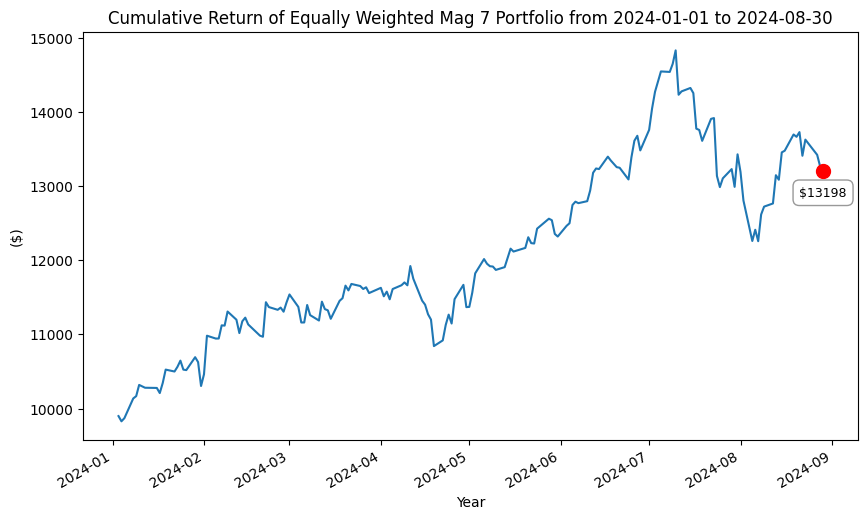

In [5]:
portfolio_returns = mag7_df.groupby('Date')['return'].mean()
cumulative_returns = (1+portfolio_returns).cumprod()-1

final_return = cumulative_returns.iloc[-1]
print(f"The Cumulative Return of this Portfolio on {end_date} is {round(final_return,3)}")

#Now lets plot this with initial investment
initial_investment = 10000
portfolio_value_mg7 = initial_investment * (1+cumulative_returns)

final_portfolio_value = portfolio_value_mg7.iloc[-1]

plt.figure(figsize=(10,6))
portfolio_value_mg7.plot()
plt.plot(portfolio_value_mg7.index[-1],final_portfolio_value,'ro',markersize=10)
plt.title(f"Cumulative Return of Equally Weighted Mag 7 Portfolio from {start_date} to {end_date}")
plt.annotate(f'${round(final_portfolio_value)}', 
             (portfolio_value_mg7.index[-1], final_portfolio_value),
             xytext=(0, -20), 
             textcoords='offset points',
             ha='center',
             va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8),
             fontsize=9)
plt.xlabel('Year')
plt.ylabel('($)')
plt.show()

## Lowest Residual Return Strategy

On each trading day, compute the residual return of each security.
Rank the residual returns and put 100% of your portfolio to the stock with the lowest residual return and hold it till the end of the next day. Assume that you can buy the stock at the close price on the ranking day. 

Re-rank stocks and rebalance at the end of each day. Now answer the following questions:
- Compute α and β of each security.

In [6]:
#Initialize the client for historical data
client = StockHistoricalDataClient(API_KEY, SECRET_KEY)

#Maginificent 7 Stocks & SPY
symbols = ["AAPL", "MSFT", "TSLA", "GOOGL", "NVDA", "META", "AMZN"]
start_date = '2024-01-01'
end_date = '2024-08-30'

request_params = StockBarsRequest(
    symbol_or_symbols=symbols,
    timeframe=TimeFrame.Day,
    start=start_date,
    end=end_date,
    adjustment='split' #potential stock splits
)
stock_bars = client.get_stock_bars(request_params)
mag7_df_2 = stock_bars.df.reset_index()
mag7_df_2['timestamp'] = pd.to_datetime(mag7_df_2['timestamp']).dt.strftime('%Y-%m-%d')
mag7_df_2.rename(columns={'timestamp': 'Date'}, inplace=True)
mag7_df_2['Date'] = pd.to_datetime(mag7_df_2['Date'])
mag7_df_2.head()


,symbol,Date,open,high,low,close,volume,trade_count,vwap
0,META,2024-01-02,351.32,353.1600,340.0100,346.29,19046256.0,305010.0,344.717959
1,META,2024-01-03,344.98,347.9500,343.1750,344.47,15452870.0,218294.0,345.216499
2,META,2024-01-04,344.50,348.1499,343.3987,347.12,12101235.0,172433.0,346.417522
3,META,2024-01-05,346.99,353.5000,346.2601,351.95,13750912.0,215312.0,351.142553
4,META,2024-01-08,354.70,358.9800,352.0500,358.66,13893482.0,219874.0,356.275361


In [7]:
# Calculate daily returns
mag7_df_2['return'] = mag7_df_2.groupby('symbol')['close'].pct_change()
mag7_df_2

,symbol,Date,open,high,low,close,volume,trade_count,vwap,return
0,META,2024-01-02,351.320,353.1600,340.0100,346.29,19046256.0,305010.0,344.717959,NaN
1,META,2024-01-03,344.980,347.9500,343.1750,344.47,15452870.0,218294.0,345.216499,-0.005256
2,META,2024-01-04,344.500,348.1499,343.3987,347.12,12101235.0,172433.0,346.417522,0.007693
3,META,2024-01-05,346.990,353.5000,346.2601,351.95,13750912.0,215312.0,351.142553,0.013914
4,META,2024-01-08,354.700,358.9800,352.0500,358.66,13893482.0,219874.0,356.275361,0.019065
...,...,...,...,...,...,...,...,...,...,...
1164,TSLA,2024-08-23,214.455,221.4800,214.2100,220.32,81525207.0,932936.0,218.453752,0.045856
1165,TSLA,2024-08-26,218.750,219.0900,211.0100,213.21,59301187.0,865858.0,213.843704,-0.032271
1166,TSLA,2024-08-27,213.250,215.6600,206.9400,209.21,62821390.0,788663.0,209.894912,-0.018761
1167,TSLA,2024-08-28,209.720,211.8400,202.5900,205.75,64116350.0,816477.0,205.951438,-0.016538


In [8]:
#Import The Fama-French 5 Factor Data

ff5 = pd.read_csv('/Users/vighneshraj/Documents/2024-MS BANA/Fall 2024/FIN7053-AlgoTrading/ff5.csv')
ff5['Date'] = pd.to_datetime(ff5['Date'], format='%Y%m%d')
ff5 = ff5[ff5['Date']>='2024-01-01']
ff5.head()

,Date,mktrf,smb,hml,rmw,cma,rf,umd
15103,2024-01-02,-0.0070,-0.0026,0.0079,0.0066,0.0064,0.00022,-0.0221
15104,2024-01-03,-0.0101,-0.0193,-0.0014,0.0035,-0.0018,0.00022,0.0058
15105,2024-01-04,-0.0033,0.0024,0.0009,-0.0043,0.0024,0.00022,-0.0033
15106,2024-01-05,0.0015,-0.0059,0.0065,0.0011,-0.0015,0.00022,-0.0028
15107,2024-01-08,0.0149,0.0055,-0.0131,-0.0098,-0.0049,0.00022,0.0088


In [13]:
df = mag7_df_2[['symbol','Date','close','return']].merge(ff5,how='left',on='Date')
df = df.dropna()
df['market_excess'] = df['mktrf']-df['rf']
df.sort_values(by=['Date','symbol'])
df


,symbol,Date,close,return,mktrf,smb,hml,rmw,cma,rf,umd,market_excess
1,META,2024-01-03,344.47,-0.005256,-0.0101,-0.0193,-0.0014,0.0035,-0.0018,0.00022,0.0058,-0.01032
2,META,2024-01-04,347.12,0.007693,-0.0033,0.0024,0.0009,-0.0043,0.0024,0.00022,-0.0033,-0.00352
3,META,2024-01-05,351.95,0.013914,0.0015,-0.0059,0.0065,0.0011,-0.0015,0.00022,-0.0028,0.00128
4,META,2024-01-08,358.66,0.019065,0.0149,0.0055,-0.0131,-0.0098,-0.0049,0.00022,0.0088,0.01468
5,META,2024-01-09,357.43,-0.003429,-0.0021,-0.0075,-0.0090,-0.0030,-0.0018,0.00022,0.0100,-0.00232
...,...,...,...,...,...,...,...,...,...,...,...,...
1164,TSLA,2024-08-23,220.32,0.045856,0.0129,0.0190,0.0085,-0.0048,0.0068,0.00022,0.0013,0.01268
1165,TSLA,2024-08-26,213.21,-0.032271,-0.0034,0.0033,0.0016,0.0013,-0.0006,0.00022,-0.0045,-0.00362
1166,TSLA,2024-08-27,209.21,-0.018761,0.0006,-0.0090,0.0002,0.0027,0.0023,0.00022,0.0053,0.00038
1167,TSLA,2024-08-28,205.75,-0.016538,-0.0067,-0.0022,0.0114,0.0055,-0.0016,0.00022,0.0030,-0.00692


In [14]:
# Initialize a DataFrame to store Results
results_list = pd.DataFrame()

# Loop through each symbol
for symbol in symbols:
    # Filter the data for the current symbol
    symbol_data = df[df['symbol'] == symbol]
    
    # Define the independent variables (X) and dependent variable (Y)
    X = symbol_data[['market_excess', 'smb', 'hml', 'rmw', 'cma']]
    X = sm.add_constant(X)  # Add a constant term for the intercept (alpha)
    Y = symbol_data['return'] - symbol_data['rf']  # Portfolio excess return
    
    # Fit the regression model
    model = sm.OLS(Y, X).fit()
    
    # Extract the coefficients
    results = pd.DataFrame([{
        'Symbol': symbol,
        'Alpha': model.params['const'],
        'Beta_Market_Excess': model.params['market_excess'],
        'Beta_SMB': model.params['smb'],
        'Beta_HML': model.params['hml'],
        'Beta_RMW': model.params['rmw'],
        'Beta_CMA': model.params['cma']
    }])
    
    # Use pd.concat to add the row to the results DataFrame
    results_list = pd.concat([results_list, results], ignore_index=True)

# Display the results DataFrame
print(results_list)



  Symbol     Alpha  Beta_Market_Excess  Beta_SMB  Beta_HML  Beta_RMW  Beta_CMA
0   AAPL  0.000397            0.919600  0.391717 -0.600666  0.970847  0.041599
1   MSFT -0.000567            1.077287 -0.291629 -0.173365 -0.018045 -0.643859
2   TSLA -0.001797            2.085184  0.442923 -0.815009  0.850424  0.988191
3  GOOGL -0.000155            1.128456 -0.259767 -0.255041 -0.001939 -0.454720
4   NVDA  0.003339            2.686680 -0.784328 -1.487635  0.552484  0.152898
5   META  0.000877            1.501567 -0.977042  0.016066 -0.956238 -1.479856
6   AMZN -0.000436            1.305712 -0.288715 -0.132449 -0.577492 -1.082458


/var/folders/86/h8k6zfgd2g14g9f0xvxh0rxr0000gn/T/ipykernel_20127/1462799750.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('symbol').apply(compute_residuals)


The Cumulative Return of this Portfolio on 2024-08-30 is 1.184


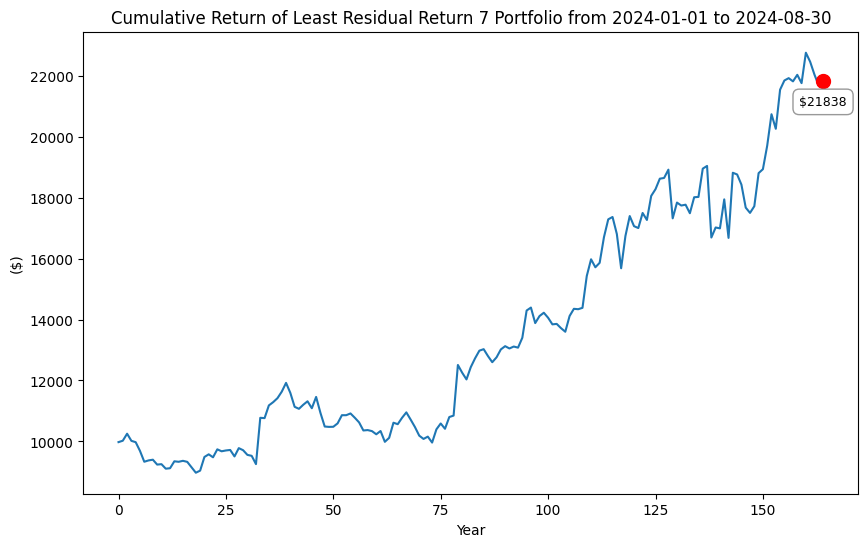

In [15]:
# Ensure data is sorted by date and symbol
df = df.sort_values(by=['Date', 'symbol'])

# Initialize a column to store residual returns
df['residual_return'] = 0.0

# Compute residual returns for each stock
def compute_residuals(group):
    # Define independent variables (Fama-French factors)
    X = group[['market_excess', 'smb', 'hml', 'rmw', 'cma']]
    X = sm.add_constant(X)  # Add constant for alpha (intercept)
    Y = group['return']  # Dependent variable (actual return)
    
    # Fit the model
    model = sm.OLS(Y, X).fit()
    
    # Compute residuals
    group['residual_return'] = model.resid
    return group

# Apply the residual computation for each stock
df = df.groupby('symbol').apply(compute_residuals)

# Initialize a DataFrame to store portfolio returns
portfolio_returns = []

# Simulate the portfolio strategy
unique_dates = df['Date'].unique()

for i in range(len(unique_dates) - 1):  # Loop through all dates except the last
    today = unique_dates[i]
    tomorrow = unique_dates[i + 1]
    
    # Filter today's data
    today_data = df[df['Date'] == today]
    
    # Rank stocks by residual return (ascending order)
    today_data = today_data.sort_values(by='residual_return', ascending=True)
    
    # Select the stock with the lowest residual return
    selected_stock = today_data.iloc[0]['symbol']
    
    # Get the stock's return for the next day
    next_day_data = df[(df['Date'] == tomorrow) & (df['symbol'] == selected_stock)]
    if not next_day_data.empty:
        portfolio_return = next_day_data.iloc[0]['return']
        portfolio_returns.append(portfolio_return)

# Calculate cumulative portfolio return
LR_portfolio_return = (1 + pd.Series(portfolio_returns)).cumprod() - 1

# Final portfolio return
LR_final_return = LR_portfolio_return.iloc[-1]
print(f"The Cumulative Return of this Portfolio on {end_date} is {round(LR_final_return,3)}")


#Now lets plot this with initial investment
initial_investment = 10000
LR_Portfolio_value = initial_investment *(1+LR_portfolio_return)

LR_final_portfolio_value = LR_Portfolio_value.iloc[-1]


plt.figure(figsize=(10,6))
LR_Portfolio_value.plot()
plt.plot(LR_Portfolio_value.index[-1],LR_final_portfolio_value,'ro',markersize=10)
plt.title(f"Cumulative Return of Least Residual Return 7 Portfolio from {start_date} to {end_date}")
plt.annotate(f'${round(LR_final_portfolio_value)}', 
             (LR_Portfolio_value.index[-1], LR_final_portfolio_value),
             xytext=(0, -20), 
             textcoords='offset points',
             ha='center',
             va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8),
             fontsize=9)
plt.xlabel('Year')
plt.ylabel('($)')
plt.show()